# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [55]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [56]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.dropna(subset=['TOTAL_REVENUE'], inplace=True)
df.dropna(subset=['INSTRUCTION_EXPENDITURE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: **Grade 8 Math**

How many years of data are logged in our dataset? **13**

In [57]:
df['YEAR'].nunique()

9

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose? **Ohio :(**

In [58]:
df.groupby('STATE')['AVG_MATH_8_SCORE'].mean()

STATE
ALABAMA                 264.444444
ALASKA                  281.285714
ARIZONA                 274.888889
ARKANSAS                270.333333
CALIFORNIA              269.000000
COLORADO                284.625000
CONNECTICUT             283.000000
DELAWARE                279.125000
DISTRICT_OF_COLUMBIA    249.777778
FLORIDA                 274.375000
GEORGIA                 272.777778
HAWAII                  270.222222
IDAHO                   282.333333
ILLINOIS                280.250000
INDIANA                 282.888889
IOWA                    284.500000
KANSAS                  286.750000
KENTUCKY                275.444444
LOUISIANA               266.777778
MAINE                   284.222222
MARYLAND                280.555556
MASSACHUSETTS           291.666667
MICHIGAN                276.666667
MINNESOTA               291.111111
MISSISSIPPI             262.666667
MISSOURI                278.888889
MONTANA                 288.125000
NEBRASKA                282.888889
NEVADA        

Find the average for your chosen test across all states in 2019

In [59]:
df2019 = df[df['YEAR'] == 2019]
df2019['AVG_MATH_8_SCORE'].mean()

nan

For each state, find a maximum value for your chosen test score

In [60]:
df.groupby('STATE')['AVG_MATH_8_SCORE'].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              276.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    265.0
FLORIDA                 281.0
GEORGIA                 279.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             271.0
MISSOURI                286.0
MONTANA                 293.0
NEBRASKA                286.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_MEXICO              274.0
NEW_YORK                283.0
NORT

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [61]:
df['PERCENT_EXPENDITURE'] = df['TOTAL_REVENUE']/df['INSTRUCTION_EXPENDITURE']

Feature engineering justification: **Created a column that describes the percent of state/federal revenue spent in each state on instructional expeditures. This feature could aid in answering the question, "Do States with higher value on education perform better?"**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='PERCENT_EXPENDITURE', ylabel='AVG_MATH_8_SCORE'>

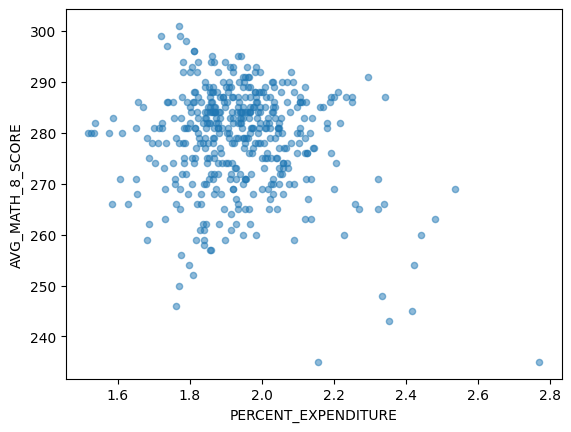

In [62]:
df.plot.scatter(x='PERCENT_EXPENDITURE', y='AVG_MATH_8_SCORE', alpha=0.5)

**Scatter plot showing the relationship between the percentage of state expenditure spent on instructional education and average 8th grade math scores. Each point represents a data entry, with transparency (alpha=0.5) applied to handle overlap.**

**Visualization 2**

<Axes: xlabel='TOTAL_REVENUE', ylabel='AVG_MATH_8_SCORE'>

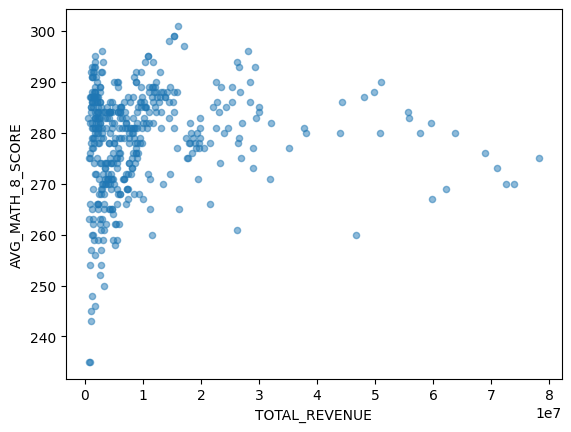

In [63]:
df.plot.scatter(x='TOTAL_REVENUE', y='AVG_MATH_8_SCORE', alpha=0.5)

**Scatter plot showing the relationship between the total state revenue and average 8th grade math scores. Each point represents a data entry, with transparency (alpha=0.5) applied to handle overlap.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# X =
# y = 

X = df[['TOTAL_REVENUE', 'PERCENT_EXPENDITURE']].dropna()
Y = df.loc[X.index]['AVG_MATH_8_SCORE']
Y.fillna(Y.mean(), inplace=True)

In [66]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [67]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [68]:
# create your model here
model = LinearRegression()

In [69]:
model.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [71]:
print(model.score(X_test, Y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))

0.02537671419334797
8.782726327671242


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

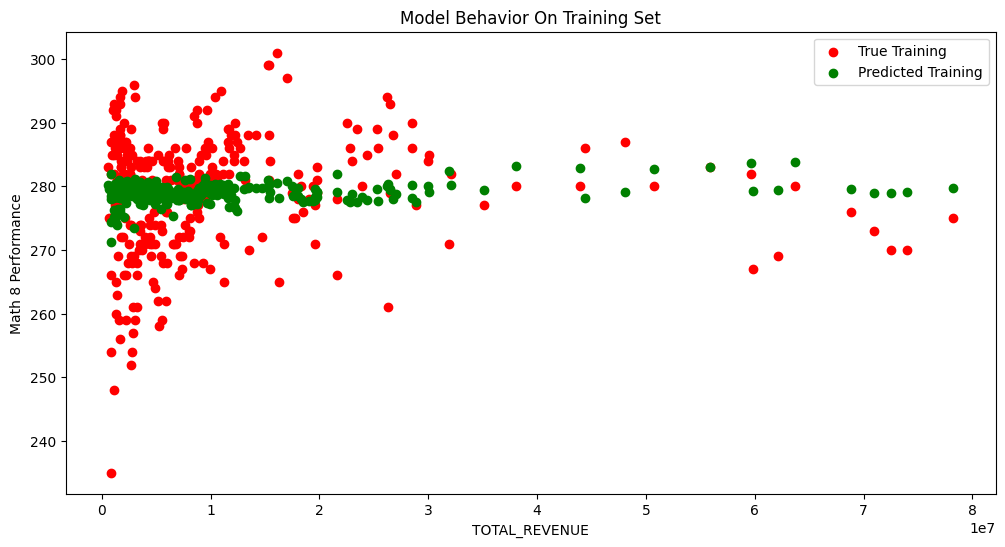

In [77]:
col_name = 'TOTAL_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Performance')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

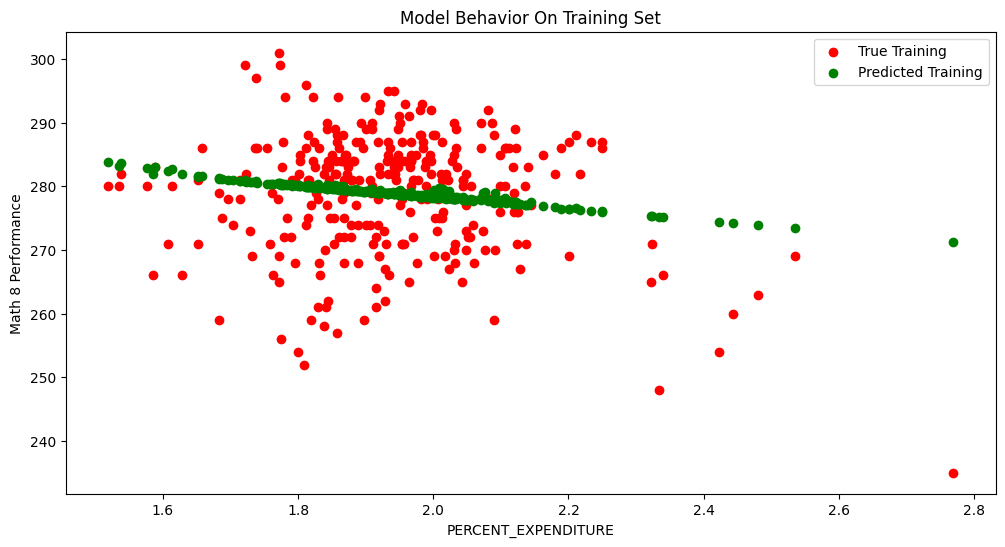

In [78]:
col_name = 'PERCENT_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Performance')
plt.title("Model Behavior On Training Set")